In [ ]:
from google.colab import files
uploaded = files.upload()

Saving height-weight.csv to height-weight.csv


In [ ]:
import pandas as pd

# Load the datasets
df = pd.read_csv('height-weight.csv')

# Display first few rows
df.head()


,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


In [ ]:
# import other libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
df.size

46

In [ ]:
df.describe()

,Weight,Height
count,23.000000,23.000000
mean,73.826087,158.391304
std,17.872407,19.511626
min,45.000000,120.000000
25%,59.000000,142.500000
50%,78.000000,162.000000
75%,86.000000,175.000000
max,105.000000,183.000000


In [ ]:
df.isnull().sum()

,0
Weight,0
Height,0


Text(0, 0.5, 'Height')

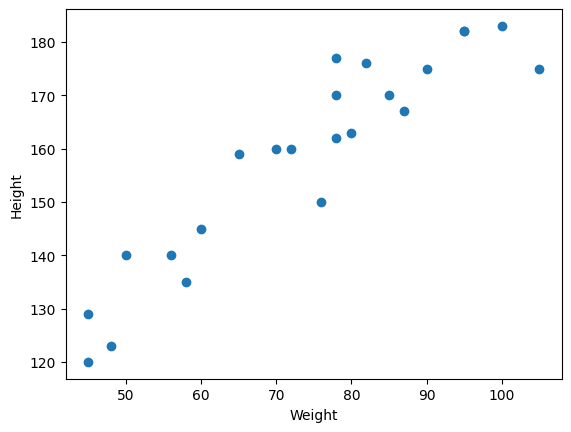

In [ ]:
## Scatter plot
plt.scatter(df['Weight'],df['Height'])
plt.xlabel('Weight')
plt.ylabel('Height')

In [ ]:
## Finding correlation
df.corr()

,Weight,Height
Weight,1.000000,0.931142
Height,0.931142,1.000000


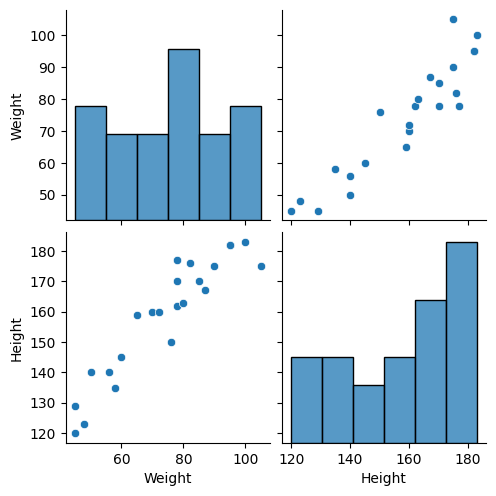

In [ ]:
sns.pairplot(df)

In [ ]:
## dependent and independent feature
X = df['Weight']
X

,Weight
0,45
1,58
2,48
3,60
4,70
5,78
6,80
7,90
8,95
9,78


In [ ]:
type(X)

pandas.core.series.Series

In [ ]:
X = df[["Weight"]]
type(X)

pandas.core.frame.DataFrame

In [ ]:
X.head()

,Weight
0,45
1,58
2,48
3,60
4,70


In [ ]:
# Either can be DataFrame or 2D array when we plot. It should not be 1D
np.array(X).shape

(23, 1)

In [ ]:
# For eg - if we dont add two brackets, it will be 1D array
X = df['Weight']
np.array(X).shape

(23,)

In [ ]:
X = df[["Weight"]] ### Independent features should be DataFrame or 2D
y = df['Height'] ### This variable can be in series or 1D

In [ ]:
### Train test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25, random_state= 42)

In [ ]:
X_train.shape

(17, 1)

In [ ]:
X_test.shape

(6, 1)

In [ ]:
## Standardization - This not relavant to the current problem
from sklearn.preprocessing import StandardScaler
import numpy as np

# Example data: 3 rows, 2 features (height and weight)
data = np.array([[140, 40],
                 [150, 50],
                 [160, 60]])

# Create a scaler
scaler = StandardScaler()

# Fit and transform the data
standardized_data = scaler.fit_transform(data)

print(standardized_data)


[[-1.22474487 -1.22474487]
 [ 0.          0.        ]
 [ 1.22474487  1.22474487]]


In [ ]:
df = pd.DataFrame(standardized_data)
df

,0,1
0,-1.224745,-1.224745
1,0.000000,0.000000
2,1.224745,1.224745


In [ ]:
import numpy as np
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# Example data: 3 rows, 1 feature (height)
data_height = np.array([[140],
                 [150],
                 [160]])

# Example data: 3 rows, 1 feature (Weight)
data_weight = np.array([[40],
                 [50],
                 [60]])

# Fit and transform the data
standardized_data_height = scaler.fit_transform(data_height)
standardized_data_weight = scaler.fit_transform(data_weight)

print(standardized_data_height)
print("---------")
print(standardized_data_weight)


[[-1.22474487]
 [ 0.        ]
 [ 1.22474487]]
---------
[[-1.22474487]
 [ 0.        ]
 [ 1.22474487]]


In [ ]:
X_train = scaler.fit_transform(X_train)
X_train

array([[-0.87662801],
       [ 1.66773133],
       [ 0.33497168],
       [-1.48242785],
       [ 1.36483141],
       [-1.6641678 ],
       [-0.75546804],
       [-0.1496682 ],
       [ 0.21381171],
       [-1.36126788],
       [-0.99778797],
       [-0.02850823],
       [ 1.06193149],
       [ 0.57729161],
       [ 0.75903157],
       [ 0.88019153],
       [ 0.45613165]])

In [ ]:
X_test = scaler.transform(X_test) # Only use transform and use the mean and SD from X_train (Data Leakage if you use fit_transform)
X_test

array([[ 0.33497168],
       [ 0.33497168],
       [-1.6641678 ],
       [ 1.36483141],
       [-0.45256812],
       [ 1.97063125]])

In [ ]:
## Apply Simple Linear Reg
from sklearn.linear_model import LinearRegression
reg = LinearRegression(n_jobs=-1)
reg.fit(X_train,y_train)

LinearRegression(n_jobs=-1)

In [ ]:
print(X_test)

print(reg.predict(X_test))

[[ 0.33497168]
 [ 0.33497168]
 [-1.6641678 ]
 [ 1.36483141]
 [-0.45256812]
 [ 1.97063125]]
[162.26499721 162.26499721 127.68347133 180.07972266 148.64197186
 190.55897293]


In [ ]:
reg.coef_

array([17.2982057])

In [ ]:
reg.intercept_

np.float64(156.47058823529412)

In [ ]:
print("Coefficient or Slope:", reg.coef_ )
print("Intercept:", reg.intercept_)

Coefficient or Slope: [17.2982057]
Intercept: 156.47058823529412


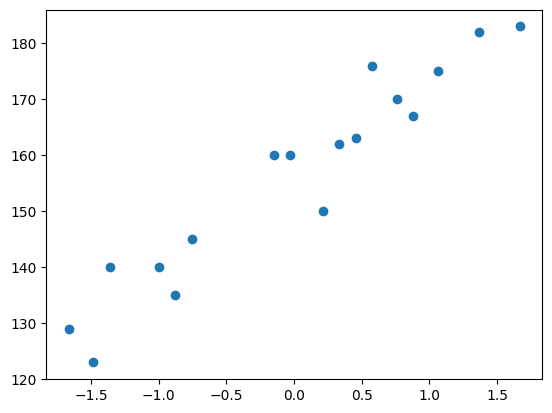

In [ ]:
## Plot the best fit line with respect to training data
plt.scatter(X_train,y_train)

Text(0, 0.5, 'Height')

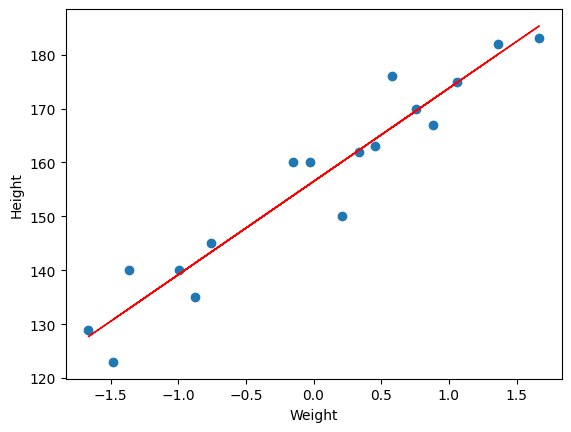

In [ ]:
plt.scatter(X_train,y_train)
plt.plot(X_train,reg.predict(X_train),color='red',linewidth=1)
plt.xlabel('Weight')
plt.ylabel('Height')

# Prediction of test data
1. predicted height output = intercept + coef_ * weight
2. y_pred_test = 156.47 + 17.29 * 0.33497168

In [ ]:
y_pred_test = 156.47 + 17.29 * 0.33497168 # checking for the test data (with one example)
y_pred_test

162.2616603472

In [ ]:
# Prediction for test data
y_pred = reg.predict(X_test)
y_pred

array([162.26499721, 162.26499721, 127.68347133, 180.07972266,
       148.64197186, 190.55897293])

# Perfromance Matrices

1.MSE

2.MAE

3.RMSE

4.R-squared

    R^2 = 1-SSR/SST

    SSR - Sum of Square of Residual

    SST - Sum of square of total

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test,y_pred)
print("MSE:",mse)
print("MAE:",mae)
print("RMSE:",rmse)
print("R-squared:",r2)

MSE: 114.84069295228699
MAE: 9.66512588679501
RMSE: 10.716374991212605
R-squared: 0.7360826717981276


In [ ]:
## OLS - Can we get the same output?
import statsmodels.api as sm
model = sm.OLS(y_train,X_train).fit()
prediction = model.predict(X_test)
prediction

array([  5.79440897,   5.79440897, -28.78711691,  23.60913442,
        -7.82861638,  34.08838469])

In [ ]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                 Height   R-squared (uncentered):                   0.012
Model:                            OLS   Adj. R-squared (uncentered):             -0.050
Method:                 Least Squares   F-statistic:                             0.1953
Date:                Mon, 23 Jun 2025   Prob (F-statistic):                       0.664
Time:                        04:14:11   Log-Likelihood:                         -110.03
No. Observations:                  17   AIC:                                      222.1
Df Residuals:                      16   BIC:                                      222.9
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=17 observations were given.
  return hypotest_fun_in(*args, **kwds)
